In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/aceassess/palm_ffb.csv
/kaggle/input/aceassess/ingredient.csv


In [92]:
#Prepare Data
Data = pd.read_csv('../input/aceassess/palm_ffb.csv')
Data["Date"]=range(Data.shape[0]) #convert to running number of months

In [93]:
#We start we a simple cursory investigation by comparing the spearman and pearson coefficient 
#of each pair with the FFB Yield

#Based solely on the correlation, we can see that HA_Harvested has the largest impact
#followed by precipitation
#For HA Harvested it could be possible that the larger the area that needs
#to be covered the lower yield will be either due to worker productivity or how long the 
#FFB takes to be collected and sent to the mill.
#Precipitation could positively impact yield due to eleviating water stress from the palms


Corrs = np.empty(Data.shape[1]-1, dtype=object) 

for i in range(Data.shape[1]-1):
    #plt.subplot( math.ceil(math.sqrt(Data.shape[1])), math.ceil(math.sqrt(Data.shape[1])),i+1)
    CurDat=Data.iloc[:,i]
    corr, _ = stats.spearmanr(Data["FFB_Yield"], CurDat)
    corr2, _ = stats.pearsonr(Data["FFB_Yield"], CurDat)
    Corrs[i]=abs(corr2)
    print('Variable: ', Data.columns[i], ', Spearmans: %.3f' % corr, 'Pearson: %.3f' % corr2 )

Variable:  Date , Spearmans: 0.088 Pearson: 0.113
Variable:  SoilMoisture , Spearmans: -0.054 Pearson: -0.003
Variable:  Average_Temp , Spearmans: -0.036 Pearson: -0.005
Variable:  Min_Temp , Spearmans: 0.084 Pearson: 0.104
Variable:  Max_Temp , Spearmans: -0.111 Pearson: -0.071
Variable:  Precipitation , Spearmans: 0.312 Pearson: 0.290
Variable:  Working_days , Spearmans: 0.100 Pearson: 0.116
Variable:  HA_Harvested , Spearmans: -0.386 Pearson: -0.350


In [94]:
#The spearman and Pearson coefficients are arbitrarily close enough to assume
#Next we can do backward elimination to verify if we should focus on only Precipitation 
#and HA_Harvested

print(np.argsort(-Corrs))

x = Data.drop('FFB_Yield', axis=1)
y = Data['FFB_Yield']

x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = 0.2, random_state = 0)

# add a column of ones as integer data type
x = np.append(arr = np.ones((Data.shape[0], 1)).astype(int), 
              values = x, axis = 1)
# choose a Significance level usually 0.05, if p>0.05
#  for the highest values parameter, remove that value
x_opt = x[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

[7 5 6 0 3 4 2 1]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     5.196
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.37e-05
Time:                        19:19:34   Log-Likelihood:              -0.088495
No. Observations:                 130   AIC:                             18.18
Df Residuals:                     121   BIC:                             43.98
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5999      1.546      1.682      0.095      -0.460       5.660
x1             0.0003      0.001      0.522      0.603      -0.001       0.002
x2            -0.0010      0.001     -1.735      0.085      -0.002       0.000
x3             0.0877      0.071      1.238      0.218      -0.053       0.228
x4            -0.0217      0.039     -0.553      0.581      -0.099       0.056
x5            -0.0111      0.036     -0.309      0.758      -0.082       0.060
x6             0.0013      0.000      3.349      0.001       0.001       0.002
x7             0.0147      0.018      0.800      0.425      -0.022       0.051
x8         -3.277e-06   7.28e-07     -4.501      0.000   -4.72e-06   -1.84e-06
==============================================================================
Omnibus:                        1.290   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                1.376
Skew:                          -0.200   Prob(JB):                        0.503
Kurtosis:                       2.693   Cond. No.                     5.58e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
x_opt = x[:, [6, 8]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              FFB_Yield   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1944.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):                    1.67e-96
Time:                        19:19:34   Log-Likelihood:                         -23.726
No. Observations:                 130   AIC:                                      51.45
Df Residuals:                     128   BIC:                                      57.19
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0014      0.000      4.407      0.000       0.001       0.002
x2          1.686e-06   8.04e-08     20.961      0.000    1.53e-06    1.84e-06
==============================================================================
Omnibus:                        0.308   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.145
Skew:                          -0.078   Prob(JB):                        0.930
Kurtosis:                       3.046   Cond. No.                     9.63e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

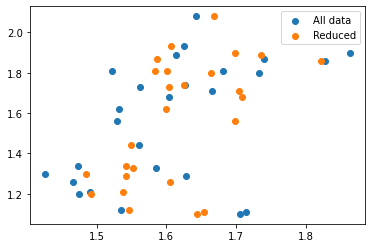

In [96]:
#Compare linear regression using all variables and linear regression with just Precipitation 
#and HA_Harvested
#There is a slight improvement, but more data will help arrive at a more definitive conclusion

lm = LinearRegression()
lm.fit(x_train, y_train)
pred = lm.predict(x_test)

plt.scatter(pred,y_test)

x_trainReduced=pd.concat([x_train["Precipitation"],x_train["HA_Harvested"]],axis=1)
x_testReduced=pd.concat([x_test["Precipitation"],x_test["HA_Harvested"]],axis=1)

lm = LinearRegression()
lm.fit(x_trainReduced, y_train)
pred = lm.predict(x_testReduced)

plt.scatter(pred,y_test)
plt.legend(["All data","Reduced"])
plt.show()